In [151]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

# Максимум 5 баллов - по ~0.7 баллов за задание

### 1. Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы. 
Для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.

In [260]:
#1.1
def diag_matrix_mult_cycle(X):
    ans = 1
    for i in range(min(X.shape)):
        if X[i][i] != 0:
            ans *= X[i][i]
    return ans

In [261]:
#1.2
def diag_matrix_mult_vector(X):
    return np.prod(X.diagonal()[X.diagonal() != 0])

In [262]:
#1.3
def diag_matrix_mult_combined(X):
    ans = 1
    for element in X.diagonal():
        if element != 0:
            ans *= element
    return ans

In [263]:
#Проверка
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
print(diag_matrix_mult_cycle(X), diag_matrix_mult_vector(X), diag_matrix_mult_combined(X))

3 3 3


In [264]:
#Тестрование на матрицах различного размера
X_2 = np.random.randint(0, 5, size=(10, 10))
X_3 = np.random.randint(0, 5, size=(50, 50))
X_4 = np.random.randint(0, 5, size=(100, 100))
X_5 = np.random.randint(0, 5, size=(500, 500))
time_cycle = [timeit.timeit(lambda: diag_matrix_mult_cycle(X), number=10000),
             timeit.timeit(lambda: diag_matrix_mult_cycle(X_2), number=10000),
             timeit.timeit(lambda: diag_matrix_mult_cycle(X_3), number=10000),
             timeit.timeit(lambda: diag_matrix_mult_cycle(X_4), number=10000),
             timeit.timeit(lambda: diag_matrix_mult_cycle(X_5), number=10000)]
time_vector = [timeit.timeit(lambda: diag_matrix_mult_vector(X), number=10000),
             timeit.timeit(lambda: diag_matrix_mult_vector(X_2), number=10000),
             timeit.timeit(lambda: diag_matrix_mult_vector(X_3), number=10000),
             timeit.timeit(lambda: diag_matrix_mult_vector(X_4), number=10000),
             timeit.timeit(lambda: diag_matrix_mult_vector(X_5), number=10000)]
time_combined = [timeit.timeit(lambda: diag_matrix_mult_combined(X), number=10000),
             timeit.timeit(lambda: diag_matrix_mult_combined(X_2), number=10000),
             timeit.timeit(lambda: diag_matrix_mult_combined(X_3), number=10000),
             timeit.timeit(lambda: diag_matrix_mult_combined(X_4), number=10000),
             timeit.timeit(lambda: diag_matrix_mult_combined(X_5), number=10000)]

C:\Users\baben_bakg1j1\AppData\Local\Temp\ipykernel_14340\135554100.py:6: RuntimeWarning: overflow encountered in scalar multiply
  ans *= X[i][i]


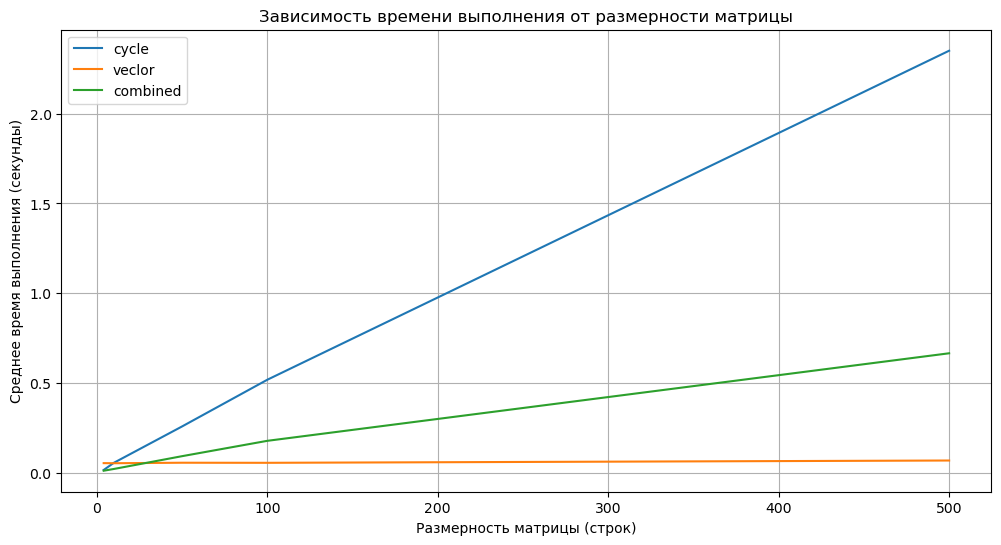

In [265]:
plt.figure(figsize=(12, 6))
plt.plot([len(x) for x in [X ,X_2, X_3, X_4, X_5]], time_cycle, label='cycle')
plt.plot([len(x) for x in [X ,X_2, X_3, X_4, X_5]], time_vector, label='veclor')
plt.plot([len(x) for x in [X ,X_2, X_3, X_4, X_5]], time_combined, label='combined')

plt.xlabel('Размерность матрицы (строк)')
plt.ylabel('Среднее время выполнения (секунды)')
plt.title('Зависимость времени выполнения от размерности матрицы')
plt.legend()
plt.grid(True)
plt.show()

**Выод:** В тестах на скороть работы 3 методов на матрицах с размерностью до 500x500 выяснилось, что на матрицах с небольшой размерностью комбинированный и циклический методы работают быстрее векторного, но на больших матрицах векторный метод показывает себя на много лучше и имеет очень схожее время работы, вне зависимости от размерности матрицы, а время работы комбинированного и циклического метода начинает возрастать, но комбинированный метод работает быстрее циклического.

### 2. Дана матрица X и два вектора одинаковой длины i и j. Построить вектор np.array([X[i[0], j[0]], X[i[1], j[1]], ... , X[i[N-1], j[N-1]]]).

In [266]:
#2.1
def vector_by_index_vector(X, i, j):
    return np.array(X[i, j])

In [267]:
#2.2
def vector_by_index_cycle(X, i, j):
    vector = np.array([], dtype=int)
    for k in range(len(i)):
        vector = np.append(vector, X[i[k], j[k]])
    return vector

In [268]:
#2.3
def vector_by_index_combined(X, i, j):
    temp = np.vectorize(lambda i, j: X[i, j])
    return temp(i, j)

In [269]:
#Проверка
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

i = np.array([0, 1, 2])
j = np.array([1, 2, 0])

print(vector_by_index_vector(X, i, j))
print(vector_by_index_cycle(X, i, j))
print(vector_by_index_combined(X, i, j))

[2 6 7]
[2 6 7]
[2 6 7]


In [277]:
#Тестрование на векторах различного размера
i_2 = np.random.randint(0, 3, size=(10))
j_2 = np.random.randint(0, 3, size=(10))
i_3 = np.random.randint(0, 3, size=(100))
j_3 = np.random.randint(0, 3, size=(100))
i_4 = np.random.randint(0, 3, size=(500))
j_4 = np.random.randint(0, 3, size=(500))
time_vector = [timeit.timeit(lambda: vector_by_index_vector(X, i, j), number=10000),
             timeit.timeit(lambda: vector_by_index_vector(X, i_2, j_2), number=10000),
             timeit.timeit(lambda: vector_by_index_vector(X, i_3, j_3), number=10000),
             timeit.timeit(lambda: vector_by_index_vector(X, i_4, j_4), number=10000)]
time_cycle = [timeit.timeit(lambda: vector_by_index_cycle(X, i, j), number=10000),
             timeit.timeit(lambda: vector_by_index_cycle(X, i_2, j_2), number=10000),
             timeit.timeit(lambda: vector_by_index_cycle(X, i_3, j_3), number=10000),
             timeit.timeit(lambda: vector_by_index_cycle(X, i_4, j_4), number=10000)]
time_combined = [timeit.timeit(lambda: vector_by_index_combined(X, i, j), number=10000),
             timeit.timeit(lambda: vector_by_index_combined(X, i_2, j_2), number=10000),
             timeit.timeit(lambda: vector_by_index_combined(X, i_3, j_3), number=10000),
             timeit.timeit(lambda: vector_by_index_combined(X, i_4, j_4), number=10000)]

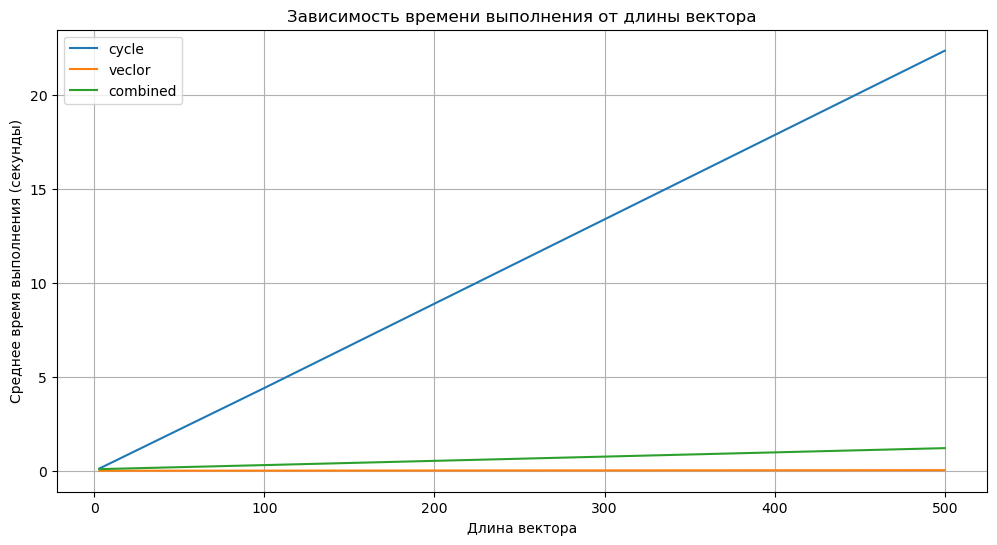

In [278]:
plt.figure(figsize=(12, 6))
plt.plot([len(x) for x in [i ,i_2, i_3, i_4]], time_cycle, label='cycle')
plt.plot([len(x) for x in [i ,i_2, i_3, i_4]], time_vector, label='veclor')
plt.plot([len(x) for x in [i ,i_2, i_3, i_4]], time_combined, label='combined')

plt.xlabel('Длина вектора')
plt.ylabel('Среднее время выполнения (секунды)')
plt.title('Зависимость времени выполнения от длины вектора')
plt.legend()
plt.grid(True)
plt.show()

**Выод:** В тестах на скороть работы 3 методов на векторах с длиной до 500 выяснилось, что векторный метод показал себя лучше всего и имел однинаковое время работы при любой длине i и j, несколько хуже его повел себя комбинорованный метод, время работы которого плавно росло с увеличением длины вектора и самым медленным оказался циклический метод, который уже слишком долго начинает работать на больших величинах i и j.

### 3. Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество. 
Для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.

In [308]:
#3.1
def if_multiset_vector(x, y):
    return np.array_equal(np.sort(x), np.sort(y))

In [309]:
#3.2
def if_multiset_combined(x, y):   
    unique_x, counts_x = np.unique(x, return_counts=True)
    unique_y, counts_y = np.unique(y, return_counts=True)
    return np.array_equal(unique_x, unique_y) and np.array_equal(counts_x, counts_y)

In [310]:
#3.3
def if_multiset_cycle(x, y):
    if len(x) != len(y):
        return False
    counter_x = {}
    counter_y = {}
    for element in x:
        if element in counter_x:
            counter_x[element] += 1
        else:
            counter_x[element] = 1
    for element in y:
        if element in counter_y:
            counter_y[element] += 1
        else:
            counter_y[element] = 1
    
    return counter_x == counter_y

In [311]:
#Проверка
x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2])
print(if_multiset_vector(x, y))
print(if_multiset_combined(x, y))
print(if_multiset_cycle(x, y))

True
True
True


In [312]:
#Тестрование на векторах различного размера
x_2 = np.random.randint(0, 3, size=(10))
y_2 = np.random.randint(0, 3, size=(10))
x_3 = np.random.randint(0, 3, size=(100))
y_3 = np.random.randint(0, 3, size=(100))
x_4 = np.random.randint(0, 3, size=(500))
y_4 = np.random.randint(0, 3, size=(500))
time_vector = [timeit.timeit(lambda: if_multiset_vector(x, y), number=10000),
             timeit.timeit(lambda: if_multiset_vector(x_2, y_2), number=10000),
             timeit.timeit(lambda: if_multiset_vector(x_3, y_3), number=10000),
             timeit.timeit(lambda: if_multiset_vector(x_4, y_4), number=10000)]
time_cycle = [timeit.timeit(lambda: if_multiset_cycle(x, y), number=10000),
             timeit.timeit(lambda: if_multiset_cycle(x_2, y_2), number=10000),
             timeit.timeit(lambda: if_multiset_cycle(x_3, y_3), number=10000),
             timeit.timeit(lambda: if_multiset_cycle(x_4, y_4), number=10000)]
time_combined = [timeit.timeit(lambda: if_multiset_combined(x, y), number=10000),
             timeit.timeit(lambda: if_multiset_combined(x_2, y_2), number=10000),
             timeit.timeit(lambda: if_multiset_combined(x_3, y_3), number=10000),
             timeit.timeit(lambda: if_multiset_combined(x_4, y_4), number=10000)]

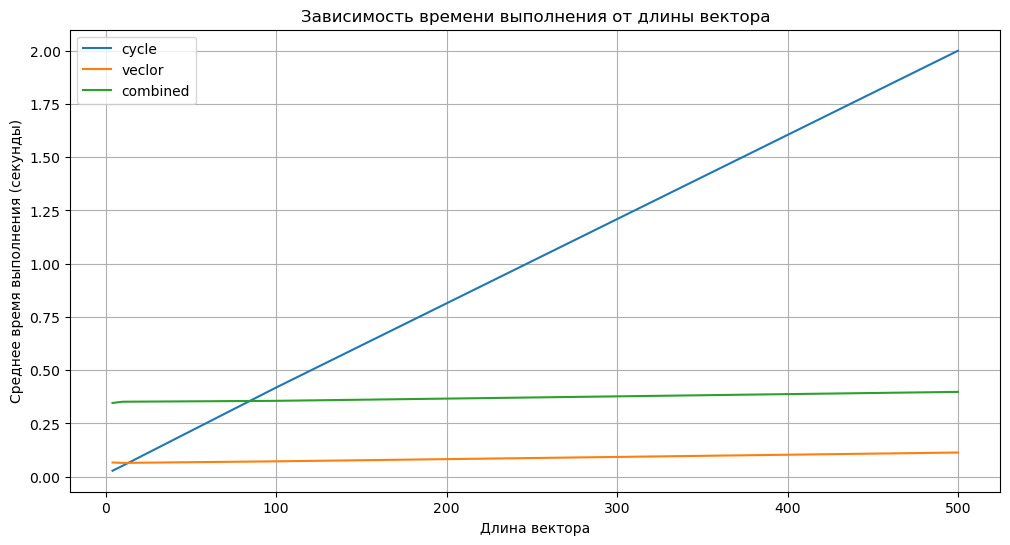

In [313]:
plt.figure(figsize=(12, 6))
plt.plot([len(x) for x in [x ,x_2, x_3, x_4]], time_cycle, label='cycle')
plt.plot([len(x) for x in [x ,x_2, x_3, x_4]], time_vector, label='veclor')
plt.plot([len(x) for x in [x ,x_2, x_3, x_4]], time_combined, label='combined')

plt.xlabel('Длина вектора')
plt.ylabel('Среднее время выполнения (секунды)')
plt.title('Зависимость времени выполнения от длины вектора')
plt.legend()
plt.grid(True)
plt.show()

**Выод:** В тестах на скороть работы 3 методов на векторах с длиной до 500 выяснилось, что векторный метод показал себя лучше всего и имел однинаковое время работы при любой длине i и j, несколько хуже его повел себя комбинорованный метод, время работы которого так же было постоянно, вне зависимости от длины вектора и самым медленным оказался циклический метод, который уже слишком долго начинает работать на больших величинах i и j.

### 4. Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. 
Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.

In [385]:
#4.1
def max_after_0_cycle(x):
    m = None
    for i in range(1, len(x)):
        if x[i-1] == 0:
            m = x[i]
            break
    for j in range(i+1, len(x)):
        if x[j-1] == 0 and x[j] > m:
            m = x[j]
    return m

In [386]:
#4.2
def max_after_0_vector(x):
    return max(x[(np.where(x == 0)[0] + 1)[np.where(x == 0)[0] + 1 < len(x)]])

In [411]:
#4.3
def max_after_0_combined(x):
    indices = np.where(x == 0)[0]
    if len(indices) > 0 and indices[0] - 1 < len(x):
        m = indices[0] + 1
        for index in indices:
            if index + 1 < len(x):
                if x[index+1] > m:
                    m = x[index+1]
            else:
                break
    else:
        return None

In [412]:
#Проверка
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) 
print(max_after_0_cycle(x))
print(max_after_0_vector(x))
print(max_after_0_combined(x))

5
5
None


In [413]:
#Тестрование на векторах различного размера
x_2 = np.random.randint(0, 3, size=(10))
x_3 = np.random.randint(0, 3, size=(100))
x_4 = np.random.randint(0, 3, size=(1000))
time_vector = [timeit.timeit(lambda: max_after_0_vector(x), number=10000),
             timeit.timeit(lambda: max_after_0_vector(x_2), number=10000),
             timeit.timeit(lambda: max_after_0_vector(x_3), number=10000),
             timeit.timeit(lambda: max_after_0_vector(x_4), number=10000)]
time_cycle = [timeit.timeit(lambda: max_after_0_cycle(x), number=10000),
             timeit.timeit(lambda: max_after_0_cycle(x_2), number=10000),
             timeit.timeit(lambda: max_after_0_cycle(x_3), number=10000),
             timeit.timeit(lambda: max_after_0_cycle(x_4), number=10000)]
time_combined = [timeit.timeit(lambda: max_after_0_combined(x), number=10000),
             timeit.timeit(lambda: max_after_0_combined(x_2), number=10000),
             timeit.timeit(lambda: max_after_0_combined(x_3), number=10000),
             timeit.timeit(lambda: max_after_0_combined(x_4), number=10000)]

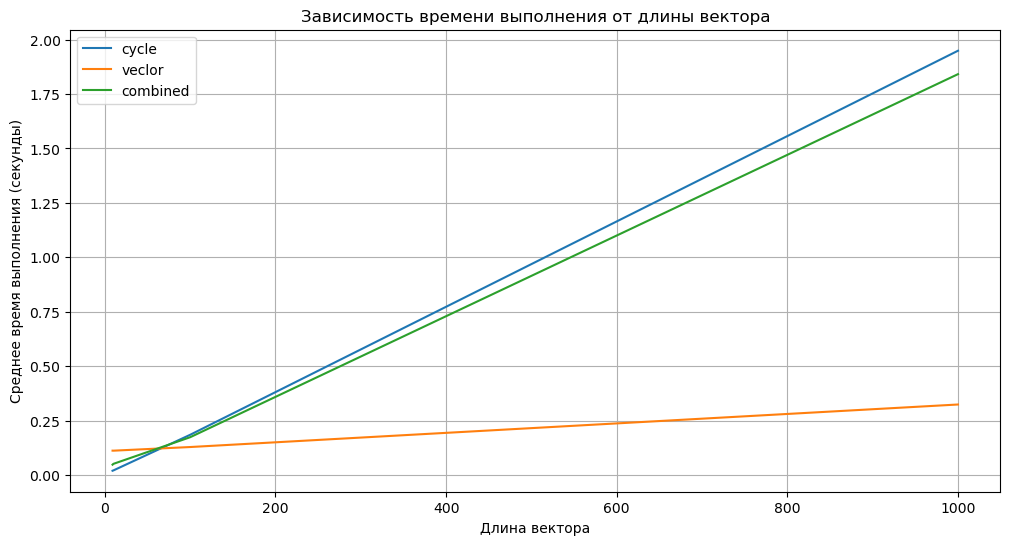

In [414]:
plt.figure(figsize=(12, 6))
plt.plot([len(x) for x in [x ,x_2, x_3, x_4]], time_cycle, label='cycle')
plt.plot([len(x) for x in [x ,x_2, x_3, x_4]], time_vector, label='veclor')
plt.plot([len(x) for x in [x ,x_2, x_3, x_4]], time_combined, label='combined')

plt.xlabel('Длина вектора')
plt.ylabel('Среднее время выполнения (секунды)')
plt.title('Зависимость времени выполнения от длины вектора')
plt.legend()
plt.grid(True)
plt.show()

**Выод:** В тестах на скороть работы 3 методов на векторах с длиной до 1000 выяснилось, что на векторах с небольшой длиной циклический метод работает немного быстрее остальных, потом по скорости идет комбинированный, но на больших матрицах векторный метод показывает себя на много лучше и с увеличением длины исходног вектора не сильно теряет во времени работы, когда время работы комбинированного и циклического метода начинает сильно возрастать, но комбинированный метод работает немного быстрее циклического.

### 5. Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow: conda install pillow). Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]).

### 6. Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить. 
Пример: x = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2]). Ответ: (np.array([2, 3, 5, 2]), np.array([3, 3, 1, 2])).

In [442]:
#6.1
def run_length_enc_cycle(x):
    numbers = []
    counts = []
    current_number = x[0]
    current_count = 1
    for i in range(1, len(x)):
        if x[i] == current_number:
            current_count += 1
        else:
            numbers.append(current_number)
            counts.append(current_count)
            current_number = x[i]
            current_count = 1
    numbers.append(current_number)
    counts.append(current_count)
    return np.array(numbers), np.array(counts)

In [443]:
#6.2
def run_length_enc_vector(x):
    idx = np.where(x[:-1] != x[1:])[0]
    counts = np.diff(np.concatenate(([0], idx, [len(x)-1])))
    numbers = x[np.append(idx, len(x) - 1)]
    return numbers, counts

In [444]:
#Поверка
x = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2])
print(run_length_enc_cycle(x))
print(run_length_enc_vector(x))

(array([2, 3, 5, 2]), array([3, 3, 1, 2]))
(array([2, 3, 5, 2]), array([2, 3, 1, 2], dtype=int64))


### 7. Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравнить с функцией scipy.spatial.distance.cdist.

##### Замечание. Можно считать, что все указанные объекты непустые (к примеру, в задаче №1 на диагонали матрицы есть ненулевые элементы).
Полезные функции NumPy: np.zeros, np.ones, np.diag, np.eye, np.arange, np.linspace, np.meshgrid,
np.random.random, np.random.randint, np.shape, np.reshape, np.transpose, np.any, np.all, np.nonzero, np.where,
np.sum, np.cumsum, np.prod, np.diff, np.min, np.max, np.minimum, np.maximum, np.argmin, np.argmax, np.unique,
np.sort, np.argsort, np.bincount, np.ravel, np.newaxis, np.dot, np.linalg.inv, np.linalg.solve.
Многие из этих функций можно использовать так: x.argmin().

# Для каждой из задач:
(a) Написать на Python + NumPy несколько вариантов кода различной эффективности. Должно быть не
менее трёх вариантов, в том числе как минимум один полностью векторизованный вариант (без циклов), и один
вариант без векторизации (с циклами). Третий вариант решения — на ваше усмотрение, например, это может быть
наиболее хорошо читаемый способ решения, или частично векторизованный вариант. Все пункты выполнять в одном google collab, разделяя их пунктами 1., 1.1, 1.2, 1.3; 2., 2.1, 2.2, 2.3; и тд.

(b) Сравнить в IPython Notebook при помощи %timeit скорость работы на нескольких тестовых наборах
РАЗНОГО размера (минимум 3, причём отличаться размеры входных данных должны минимум на порядок. Например, массивы длины 100, 1000, 10000).

(c) Проанализировать полученные данные о скорости работы разных реализаций.

(d) Получить выводы.

In [ ]:
Soft Deadline - 13 марта в 23:59
Hard Deadline - 20 марта в 23:59